In [ ]:
!pip uninstall -y numpy gensim
!pip install numpy==1.26.4 gensim==4.3.3 --no-cache-dir --force-reinstall

# Restart runtime
import os
os.kill(os.getpid(), 9)

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 169.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstalled smart-open-7.1.0
  Attempting unins

In [ ]:
!pip install nltk
!pip install contractions

import nltk
import pandas as pd
import re
import contractions
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

from gensim import corpora
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Excel file from Drive
dfHot           = pd.read_excel('/content/drive/MyDrive/WebandSocialMedia/Datasets/Shoestring_Hot_PostsOnly.xlsx')
dfTop           = pd.read_excel('/content/drive/MyDrive/WebandSocialMedia/Datasets/Shoestring_Top_PostsOnly.xlsx')
dfControversial = pd.read_excel('/content/drive/MyDrive/WebandSocialMedia/Datasets/Shoestring_Controversial_PostsOnly.xlsx')

In [ ]:
# Combine the post title and post body
dfHot['full_text']            = dfHot['post_title'].fillna('') + ' ' + dfHot['post_text'].fillna('')
dfTop['full_text']            = dfTop['post_title'].fillna('') + ' ' + dfTop['post_text'].fillna('')
dfControversial['full_text']  = dfControversial['post_title'].fillna('') + ' ' + dfControversial['post_text'].fillna('')

In [ ]:
# Used to tag each word so the lemmatizer will word better
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing pipeline
def clean_post_text(text):
    if not isinstance(text, str):
        return ""

    # Expand contractions
    try:
        text = contractions.fix(text)
    except IndexError:
        pass

    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove punctuation
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove repeated punctuation
    text = re.sub(r'[\.\!\?]{2,}', '.', text)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    custom_stopwords = {"im", "ive", "would", "get", "also", "like", "know",
                        "go", "time", "want", "u", "us", "one", "xd"}
    all_stopwords = stop_words.union(custom_stopwords)
    tokens = [word for word in tokens if word not in all_stopwords]

    # tagging words into noun, verb, adjective, etc
    tagged = pos_tag(tokens)

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged]

    # Rejoin tokens
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [ ]:
dfHot['full_text']

,full_text
0,Sticky for finding cheap flights - what inform...
1,brixen bressanone august My partner and I will...
2,Dubai in May 2025 Hi all!\n\nIm travelling to ...
3,Built a tool that shows if that dream destinat...
4,Booking.com Cancellation and Refund policy Hi ...
...,...
764,"$1500 for week long trip? Me, my partner, and..."
765,Seattle to Denver through many National Parks ...
766,Best way to avoid being robbed of my most impo...
767,Any flight deals to the US from Europe Mid Jun...


In [ ]:
# Apply preprocessing to the full text and create a new column called clean text
dfHot['clean_text'] = dfHot['full_text'].apply(clean_post_text)
dfTop['clean_text'] = dfTop['full_text'].apply(clean_post_text)
dfControversial['clean_text'] = dfControversial['full_text'].apply(clean_post_text)

In [ ]:
dfHot['clean_text']

,clean_text
0,sticky find cheap flight information see give ...
1,brixen bressanone august partner brixen bressa...
2,dubai may hi travel dubai next month two day e...
3,build tool show dream destination actually aff...
4,bookingcom cancellation refund policy hi apolo...
...,...
764,week long trip partner dog go camp week camp p...
765,seattle denver many national park expensive fe...
766,best way avoid rob important thing plan travel...
767,flight deal europe mid june july see stuff nor...


In [ ]:
# Removing cleaned sentences that have less than 5 words
dfHot = dfHot[dfHot['clean_text'].str.split().str.len() >= 5]
dfTop = dfTop[dfTop['clean_text'].str.split().str.len() >= 5]
dfControversial = dfControversial[dfControversial['clean_text'].str.split().str.len() >= 5]

In [ ]:
!pip install langdetect
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=16899aaf3886e130689cadb7a52a8b9d329f8e60e408728ad288bbad4c926125
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
# Removing cleaned sentences that are not english
dfHot = dfHot[dfHot['clean_text'].apply(is_english)]
dfTop = dfTop[dfTop['clean_text'].apply(is_english)]
dfControversial = dfControversial[dfControversial['clean_text'].apply(is_english)]

# EXPLORATORY analysis

In [ ]:
dfHot['len_words'] = dfHot['clean_text'].apply(lambda x: len(str(x).split()))
dfTop['len_words'] = dfHot['clean_text'].apply(lambda x: len(str(x).split()))
dfControversial['len_words'] = dfHot['clean_text'].apply(lambda x: len(str(x).split()))

In [ ]:
dfHot['len_words'].describe()

,len_words
count,762.000000
mean,61.677165
std,59.233259
min,6.000000
25%,30.000000
50%,46.000000
75%,75.000000
max,715.000000


In [ ]:
dfTop['len_words'].describe()

,len_words
count,276.000000
mean,62.148551
std,57.906034
min,6.000000
25%,30.000000
50%,47.000000
75%,70.250000
max,498.000000


In [ ]:
dfControversial['len_words'].describe()

,len_words
count,265.000000
mean,62.818868
std,58.936256
min,6.000000
25%,30.000000
50%,47.000000
75%,72.000000
max,498.000000


In [ ]:
dfHot['post_score'].describe()

,post_score
count,762.000000
mean,14.139108
std,76.801066
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,1568.000000


In [ ]:
dfTop['post_score'].describe()

,post_score
count,279.000000
mean,124.874552
std,124.732788
min,53.000000
25%,70.000000
50%,96.000000
75%,131.500000
max,1563.000000


In [ ]:
dfControversial['post_score'].describe()

,post_score
count,268.000000
mean,7.373134
std,36.416170
min,0.000000
25%,0.000000
50%,2.000000
75%,5.000000
max,561.000000


In [ ]:
dfHot['upvote_ratio'].describe()

,upvote_ratio
count,762.000000
mean,0.746693
std,0.185321
min,0.130000
25%,0.640000
50%,0.770000
75%,0.880000
max,1.000000


In [ ]:
dfTop['upvote_ratio'].describe()

,upvote_ratio
count,279.000000
mean,0.921649
std,0.054550
min,0.650000
25%,0.900000
50%,0.930000
75%,0.960000
max,1.000000


In [ ]:
dfControversial['upvote_ratio'].describe()

,upvote_ratio
count,268.000000
mean,0.553955
std,0.119681
min,0.280000
25%,0.477500
50%,0.560000
75%,0.640000
max,0.810000


<Axes: title={'center': 'num of Hot comments posted by the top 15 authors'}, xlabel='post_author', ylabel='comments'>

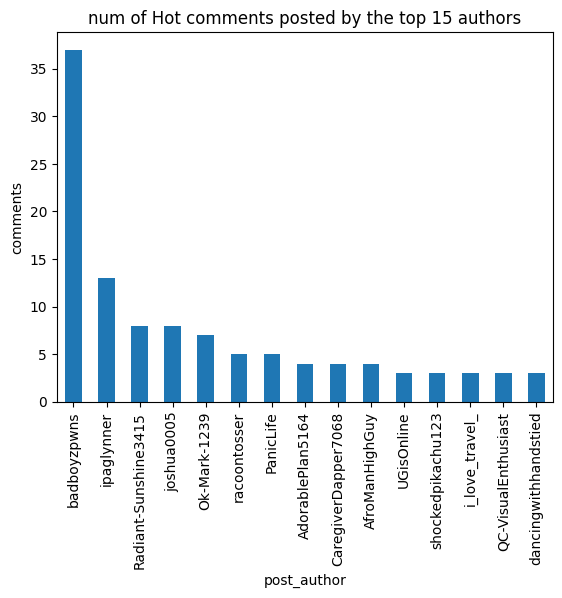

In [ ]:
dfHot.groupby(dfHot["post_author"]).size().sort_values(ascending=False).iloc[0:15].plot(kind="bar", ylabel="comments",
      title="num of Hot comments posted by the top 15 authors")

<Axes: title={'center': 'num of Top comments posted by the top 15 authors'}, xlabel='post_author', ylabel='comments'>

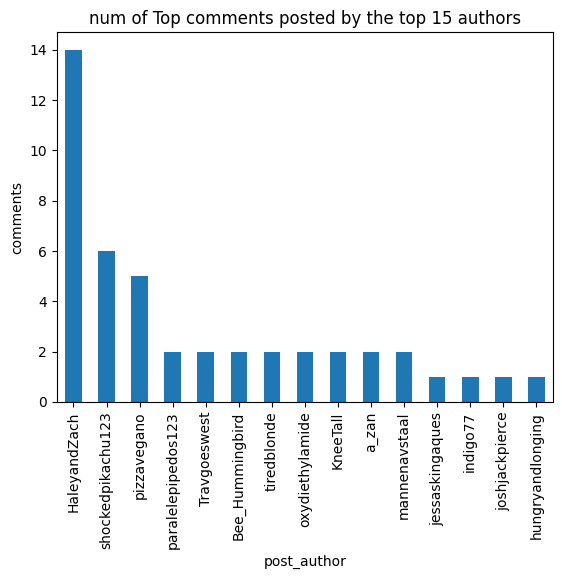

In [ ]:
dfTop.groupby(dfTop["post_author"]).size().sort_values(ascending=False).iloc[0:15].plot(kind="bar", ylabel="comments",
      title="num of Top comments posted by the top 15 authors")

<Axes: title={'center': 'num of Controv comments posted by the top 15 authors'}, xlabel='post_author', ylabel='comments'>

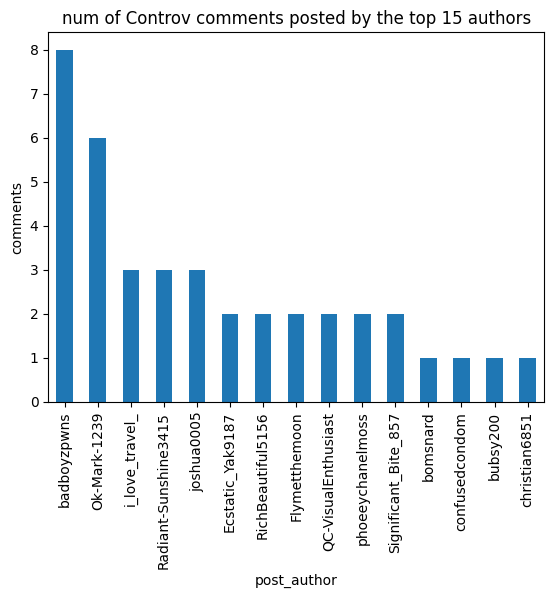

In [ ]:
dfControversial.groupby(dfControversial["post_author"]).size().sort_values(ascending=False).iloc[0:15].plot(kind="bar", ylabel="comments",
      title="num of Controv comments posted by the top 15 authors")

In [ ]:
# Term frequency
from collections import Counter

word_counter1 = Counter()
for row in dfHot.to_dict("records"):
    word_counter1.update(row["clean_text"].split())

dfHot_tf = pd.DataFrame(word_counter1.most_common(20))
dfHot_tf.columns = ["term", "frequency"]
dfHot_tf

,term,frequency
0,travel,632
1,day,575
2,trip,564
3,flight,466
4,look,390
5,cheap,331
6,plan,328
7,budget,324
8,go,285
9,place,279


In [ ]:
word_counter2 = Counter()
for row in dfTop.to_dict("records"):
    word_counter2.update(row["clean_text"].split())

dfTop_tf = pd.DataFrame(word_counter2.most_common(20))
dfTop_tf.columns = ["term", "frequency"]
dfTop_tf

,term,frequency
0,travel,307
1,day,307
2,cheap,204
3,flight,195
4,trip,183
5,city,169
6,budget,165
7,country,142
8,food,137
9,take,137


In [ ]:
word_counter3 = Counter()
for row in dfControversial.to_dict("records"):
    word_counter3.update(row["clean_text"].split())

dfControversial_tf = pd.DataFrame(word_counter3.most_common(20))
dfControversial_tf.columns = ["term", "frequency"]
dfControversial_tf

,term,frequency
0,travel,224
1,trip,171
2,flight,169
3,day,158
4,cheap,131
5,look,122
6,budget,108
7,go,101
8,plan,93
9,week,88


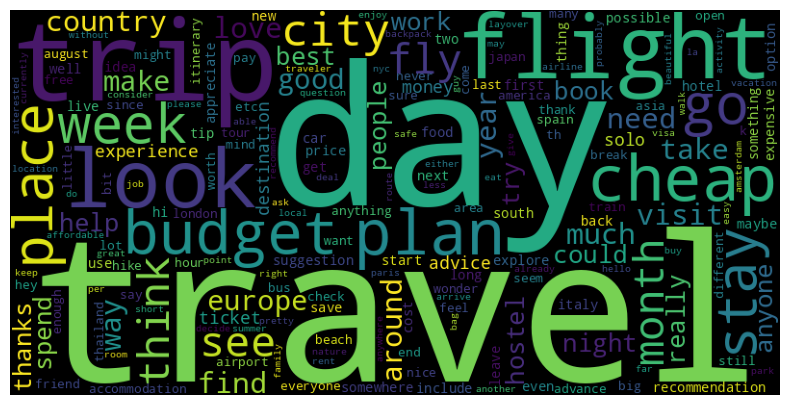

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter1.most_common(200)))
plt.figure(figsize=(10, 5))
plt.imshow(cloud)
plt.axis("off")
plt.show()

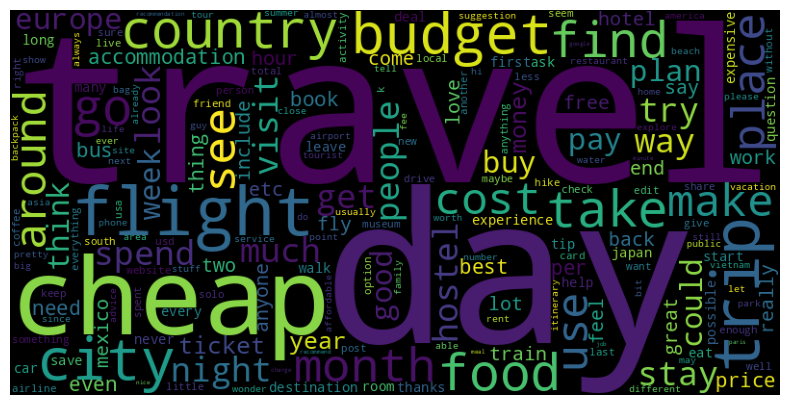

In [ ]:
cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter2.most_common(200)))
plt.figure(figsize=(10, 5))
plt.imshow(cloud)
plt.axis("off")
plt.show()

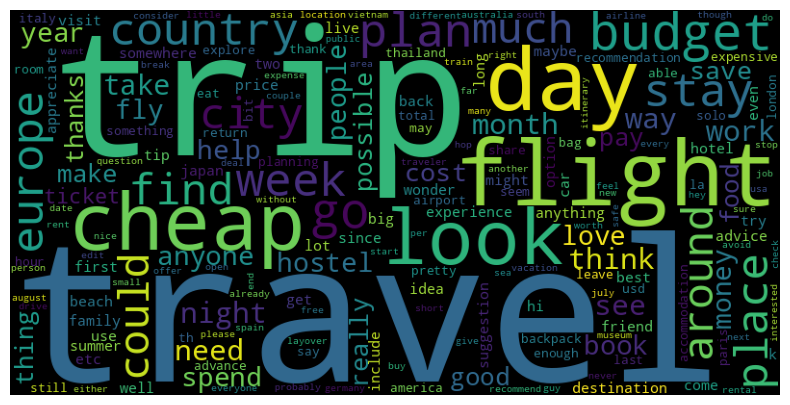

In [ ]:
cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter3.most_common(200)))
plt.figure(figsize=(10, 5))
plt.imshow(cloud)
plt.axis("off")
plt.show()

# Find most talked about locations in all posts

In [ ]:
import spacy
from collections import Counter

# Load spacy's English model
nlp = spacy.load("en_core_web_sm")

# Extract GPE entities from each post
all_places = []

for text in dfHot['clean_text'].dropna():
    doc = nlp(text)
    places = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    all_places.extend(places)

# Count destination mentions
place_counts = Counter(all_places)
print(place_counts.most_common(10))

[('japan', 82), ('italy', 78), ('london', 65), ('spain', 53), ('thailand', 47), ('paris', 43), ('france', 34), ('vietnam', 33), ('australia', 28), ('rome', 27)]


In [ ]:
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

all_places = []

for text in dfTop['clean_text'].dropna():
    doc = nlp(text)
    places = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    all_places.extend(places)

place_counts = Counter(all_places)
print(place_counts.most_common(10))

[('japan', 40), ('mexico city', 30), ('paris', 22), ('vietnam', 20), ('france', 18), ('taiwan', 18), ('mexico', 15), ('germany', 15), ('italy', 14), ('thailand', 11)]


In [ ]:
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

all_places = []

for text in dfControversial['clean_text'].dropna():
    doc = nlp(text)
    places = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    all_places.extend(places)

place_counts = Counter(all_places)
print(place_counts.most_common(10))

[('japan', 30), ('paris', 23), ('london', 21), ('italy', 20), ('thailand', 15), ('spain', 14), ('australia', 13), ('tokyo', 13), ('france', 12), ('poland', 12)]


# Add a new column to the dataframe for locations mentioned in the post

In [ ]:
import spacy

# Load the small English model
nlp = spacy.load("en_core_web_sm")

def extract_destination(text):
    if not isinstance(text, str):
        return None
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            return ent.text  # Return the first detected place
    return None

In [ ]:
dfHot['destination'] = dfHot['clean_text'].apply(extract_destination)
dfTop['destination'] = dfTop['clean_text'].apply(extract_destination)
dfControversial['destination'] = dfControversial['clean_text'].apply(extract_destination)

In [ ]:
dfHot['destination'].value_counts().head(10)

,count
destination,
italy,28
japan,28
london,26
spain,15
paris,12
germany,11
canada,11
thailand,10
australia,10


In [ ]:
dfTop['destination'].value_counts().head(10)

,count
destination,
japan,10
mexico,7
paris,6
thailand,5
mexico city,5
germany,5
london,5
estonia,4
america,4


In [ ]:
dfControversial['destination'].value_counts().head(10)

,count
destination,
japan,11
italy,11
london,10
spain,8
paris,6
tokyo,6
australia,5
uk,4
switzerland,4


# Topic modelling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.models import TfidfModel

In [ ]:
documents1 = [text.split() for text in dfHot["clean_text"]]
documents2 = [text.split() for text in dfTop["clean_text"]]
documents3 = [text.split() for text in dfControversial["clean_text"]]

In [ ]:
# Create bigrams for better context
bigram_model1 = Phrases(documents1, min_count=5, threshold=100)
bigram_phraser1 = Phraser(bigram_model1)

bigram_model2 = Phrases(documents2, min_count=5, threshold=100)
bigram_phraser2 = Phraser(bigram_model2)

bigram_model3 = Phrases(documents3, min_count=5, threshold=100)
bigram_phraser3 = Phraser(bigram_model3)

# Apply bigrams to the documents
bigram_documents1 = [bigram_phraser1[doc] for doc in documents1]
bigram_documents2 = [bigram_phraser2[doc] for doc in documents2]
bigram_documents3 = [bigram_phraser3[doc] for doc in documents3]

In [ ]:
# Create a dictionary from the documents
dictionary1 = corpora.Dictionary(bigram_documents1)
dictionary2 = corpora.Dictionary(bigram_documents2)
dictionary3 = corpora.Dictionary(bigram_documents3)

# filter extremes
dictionary1.filter_extremes(no_below=10, no_above=0.95, keep_n=10000)
dictionary2.filter_extremes(no_below=10, no_above=0.95, keep_n=10000)
dictionary3.filter_extremes(no_below=10, no_above=0.95, keep_n=10000)

# Create a bag-of-words corpus
corpus1 = [dictionary1.doc2bow(text) for text in bigram_documents1]
corpus2 = [dictionary2.doc2bow(text) for text in bigram_documents2]
corpus3 = [dictionary3.doc2bow(text) for text in bigram_documents3]

In [ ]:
# This doesnt help, it takes away common words but in our scenario these common words gives meaning to each topic so when they are out the scores are too low
# Apply TF-IDF transformation to the corpus
tfidf_model1 = TfidfModel(corpus1)
tfidf_corpus1 = tfidf_model1[corpus1]

tfidf_model2 = TfidfModel(corpus2)
tfidf_corpus2 = tfidf_model2[corpus2]

tfidf_model3 = TfidfModel(corpus3)
tfidf_corpus3 = tfidf_model3[corpus3]

In [ ]:
from gensim.models import LdaMulticore

# number of topics
num_topics = 3

# Train the model
lda_model1 = LdaMulticore(corpus=corpus1, id2word=dictionary1, num_topics=num_topics, random_state=42, passes=20, iterations=200, workers=2)
lda_model2 = LdaMulticore(corpus=corpus2, id2word=dictionary2, num_topics=num_topics, random_state=42, passes=20, iterations=200, workers=2)
lda_model3 = LdaMulticore(corpus=corpus3, id2word=dictionary3, num_topics=num_topics, random_state=42, passes=20, iterations=200, workers=2)

In [ ]:
from pprint import pprint

# View the discovered topics
pprint(lda_model1.print_topics())

[(0,
  '0.030*"flight" + 0.018*"trip" + 0.016*"travel" + 0.016*"cheap" + '
  '0.014*"fly" + 0.014*"look" + 0.013*"stay" + 0.012*"week" + 0.010*"budget" + '
  '0.010*"find"'),
 (1,
  '0.020*"travel" + 0.016*"day" + 0.011*"money" + 0.010*"plan" + 0.010*"trip" '
  '+ 0.010*"make" + 0.010*"way" + 0.010*"go" + 0.010*"ticket" + '
  '0.010*"flight"'),
 (2,
  '0.024*"day" + 0.020*"trip" + 0.018*"travel" + 0.015*"city" + 0.014*"look" + '
  '0.012*"visit" + 0.012*"place" + 0.011*"plan" + 0.011*"europe" + '
  '0.010*"country"')]


In [ ]:
pprint(lda_model2.print_topics())

[(0,
  '0.040*"city" + 0.032*"day" + 0.020*"place" + 0.019*"mexico" + 0.016*"trip" '
  '+ 0.016*"night" + 0.014*"see" + 0.014*"food" + 0.013*"best" + 0.012*"good"'),
 (1,
  '0.030*"day" + 0.025*"travel" + 0.020*"country" + 0.020*"budget" + '
  '0.015*"food" + 0.013*"take" + 0.012*"month" + 0.012*"go" + 0.012*"hostel" + '
  '0.011*"accommodation"'),
 (2,
  '0.035*"flight" + 0.028*"cheap" + 0.024*"travel" + 0.021*"find" + '
  '0.019*"trip" + 0.013*"look" + 0.013*"ticket" + 0.011*"way" + 0.010*"deal" + '
  '0.010*"use"')]


In [ ]:
pprint(lda_model3.print_topics())

[(0,
  '0.040*"travel" + 0.020*"budget" + 0.018*"cheap" + 0.017*"country" + '
  '0.016*"europe" + 0.015*"night" + 0.014*"look" + 0.014*"place" + '
  '0.013*"stay" + 0.013*"find"'),
 (1,
  '0.047*"day" + 0.031*"trip" + 0.020*"travel" + 0.019*"week" + 0.017*"go" + '
  '0.013*"think" + 0.012*"could" + 0.012*"plan" + 0.012*"city" + 0.012*"stay"'),
 (2,
  '0.062*"flight" + 0.030*"cheap" + 0.024*"book" + 0.023*"look" + '
  '0.022*"ticket" + 0.021*"way" + 0.020*"trip" + 0.019*"price" + 0.015*"bag" + '
  '0.014*"anyone"')]


In [ ]:
# This will allocate a topic for each post
def get_dominant_topic(ldamodel, corpus):
    dominant_topics = []
    for doc in corpus:
        topic_probs = ldamodel.get_document_topics(doc)
        dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
        dominant_topics.append(dominant_topic)
    return dominant_topics

In [ ]:
dfHot['dominant_topic'] = get_dominant_topic(lda_model1, corpus1)
dfTop['dominant_topic'] = get_dominant_topic(lda_model2, corpus2)
dfControversial['dominant_topic'] = get_dominant_topic(lda_model3, corpus3)

In [ ]:
# labelling topics
topic_labels_Hot = {
    0: 'Cheap flights',
    1: 'Travel planning',
    2: 'Exploring destinations'
}
topic_labels_Top = {
    0: 'Destination experiences',
    1: 'Budget food/accommodation',
    2: 'Cheap flights'
}
topic_labels_Con = {
    0: 'Budget accommodations',
    1: 'Planning short term trips',
    2: 'Cheap flights'
}

dfHot['topic_label'] = dfHot['dominant_topic'].map(topic_labels_Hot)
dfTop['topic_label'] = dfTop['dominant_topic'].map(topic_labels_Top)
dfControversial['topic_label'] = dfControversial['dominant_topic'].map(topic_labels_Con)

<Axes: title={'center': 'Topic Distribution'}, xlabel='topic_label'>

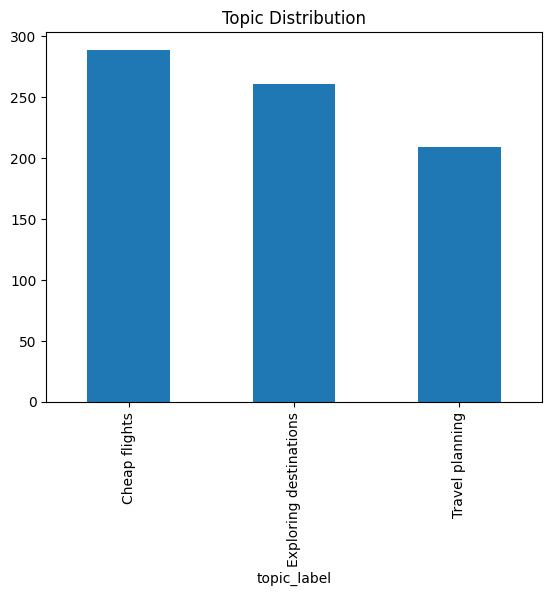

In [ ]:
dfHot['topic_label'].value_counts().plot(kind='bar', title='Topic Distribution')

<Axes: title={'center': 'Topic Distribution'}, xlabel='topic_label'>

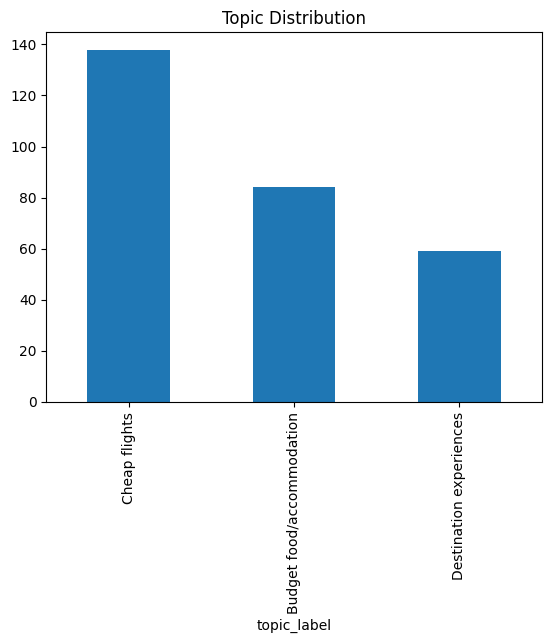

In [ ]:
dfTop['topic_label'].value_counts().plot(kind='bar', title='Topic Distribution')

<Axes: title={'center': 'Topic Distribution'}, xlabel='topic_label'>

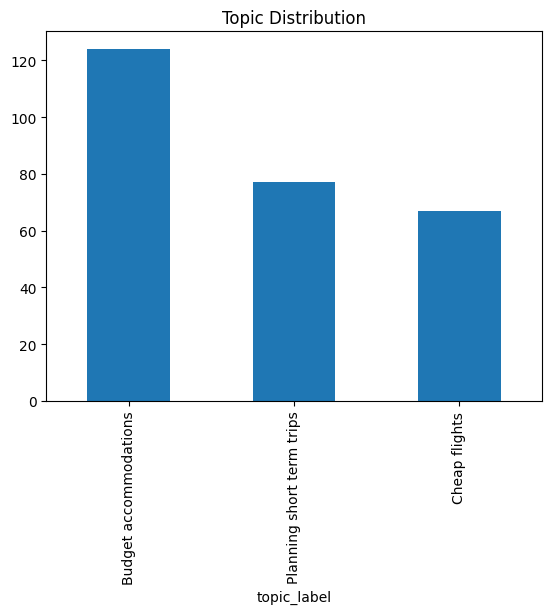

In [ ]:
dfControversial['topic_label'].value_counts().plot(kind='bar', title='Topic Distribution')

# Sentiment Analysis

# Sentiment of posts

In [ ]:
!pip install vaderSentiment
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

In [ ]:
# Apply the function to your dataframe
dfHot['sentiment_score'] = dfHot['clean_text'].apply(get_sentiment_scores)
dfTop['sentiment_score'] = dfTop['clean_text'].apply(get_sentiment_scores)
dfControversial['sentiment_score'] = dfControversial['clean_text'].apply(get_sentiment_scores)

In [ ]:
# Mark the sentiment score with a sentiment
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

dfHot['sentiment'] = dfHot['sentiment_score'].apply(classify_sentiment)
dfTop['sentiment'] = dfTop['sentiment_score'].apply(classify_sentiment)
dfControversial['sentiment'] = dfControversial['sentiment_score'].apply(classify_sentiment)

# Sentiment of comments

In [ ]:
!pip install praw
import praw

secret = "HiIVBVWpoeBrnZQ8-VHo8zYi2RN6CQ"
app_id = "Vq8i1GzujpoRqd4zQxBl9Q"

reddit = praw.Reddit(client_id=app_id,
                     client_secret=secret,
                     user_agent='ShoestringAnalysisScript')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 7.9 MB/s eta 0:00:00


In [ ]:
# Fetch comments for a given post_id
def fetch_comments(post_id, max_comments=30):
    try:
        submission = reddit.submission(id=post_id)
        submission.comments.replace_more(limit=0)
        comments = [comment.body for comment in submission.comments[:max_comments]]
        return comments
    except Exception as e:
        print("Error fetching comments for post")
        return []

# Compute average VADER sentiment score
def compute_avg_sentiment_vader(comments):
    if not comments:
        return 0

    # performing preprocessing to comment
    cleaned_comments = [clean_post_text(c) for c in comments]
    scores = [analyzer.polarity_scores(comment)['compound'] for comment in comments]
    return sum(scores) / len(scores) if scores else 0

# Add avg_comment_sentiment column to a DataFrame
def add_comment_sentiment_column(df):
    sentiments = []
    for post_id in df['post_id']:
        comments = fetch_comments(post_id)
        avg_sentiment = compute_avg_sentiment_vader(comments)
        sentiments.append(avg_sentiment)
    df['avg_comment_sentiment'] = sentiments
    return df

In [ ]:
dfHot = add_comment_sentiment_column(dfHot)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
dfTop = add_comment_sentiment_column(dfTop)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
dfControversial = add_comment_sentiment_column(dfControversial)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

dfHot['comment_sentiment'] = dfHot['avg_comment_sentiment'].apply(classify_sentiment)
dfTop['comment_sentiment'] = dfTop['avg_comment_sentiment'].apply(classify_sentiment)
dfControversial['comment_sentiment'] = dfControversial['avg_comment_sentiment'].apply(classify_sentiment)

In [ ]:
dfHot

,post_id,post_title,post_text,post_author,post_date,post_score,upvote_ratio,num_crossposts,num_comments,full_text,clean_text,dominant_topic,topic_label,sentiment_score,sentiment,destination,avg_comment_sentiment,comment_sentiment
0,zvolhu,Sticky for finding cheap flights - what inform...,"Given some recent feedback, a sticky thread fo...",SalamancaVice,2022-12-26 14:46:32,197,0.98,54,110,Sticky for finding cheap flights - what inform...,sticky find cheap flight information see give ...,0,Cheap flights,0.5423,Positive,None,0.241297,Positive
1,1k2u6f7,brixen bressanone august,My partner and I will be in Brixen / Bressanon...,ipaglynner,2025-04-19 11:30:51,1,1.00,0,0,brixen bressanone august My partner and I will...,brixen bressanone august partner brixen bressa...,2,Exploring destinations,0.9118,Positive,None,0.000000,Neutral
2,1k1zgkp,Dubai in May 2025,Hi all!\n\nIm travelling to Dubai in next mont...,Fit-Brief-6033,2025-04-18 07:51:18,2,0.75,0,2,Dubai in May 2025 Hi all!\n\nIm travelling to ...,dubai may hi travel dubai next month two day e...,2,Exploring destinations,0.6249,Positive,dubai,-0.088050,Negative
3,1k16zx9,Built a tool that shows if that dream destinat...,Curious if that Instagram-perfect destination ...,Reasonable_State7335,2025-04-17 07:26:37,6,0.64,0,32,Built a tool that shows if that dream destinat...,build tool show dream destination actually aff...,0,Cheap flights,0.9823,Positive,None,0.293643,Positive
4,1k187p7,Booking.com Cancellation and Refund policy,"Hi all,\n\nApologies that this is probably a d...",fishytata,2025-04-17 08:57:54,0,0.45,0,5,Booking.com Cancellation and Refund policy Hi ...,bookingcom cancellation refund policy hi apolo...,1,Travel planning,-0.1280,Negative,None,-0.419740,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,1cznxwl,$1500 for week long trip?,"Me, my partner, and my dog are going camping f...",coughdroptongue,2024-05-24 15:49:49,0,0.36,0,2,"$1500 for week long trip? Me, my partner, and...",week long trip partner dog go camp week camp p...,0,Cheap flights,0.8779,Positive,oklahoma,0.098100,Positive
765,1czuot3,Seattle to Denver through many National Parks ...,Thinking of doing a cross country trip Seattle...,anotheraccount97,2024-05-24 20:37:33,0,0.31,0,13,Seattle to Denver through many National Parks ...,seattle denver many national park expensive fe...,2,Exploring destinations,0.9413,Positive,denver,0.235500,Positive
766,1cze8sl,Best way to avoid being robbed of my most impo...,20M Planning to travel in Latin America for a ...,joshua0005,2024-05-24 06:25:09,3,0.60,0,25,Best way to avoid being robbed of my most impo...,best way avoid rob important thing plan travel...,1,Travel planning,-0.8638,Negative,None,0.213625,Positive
767,1czinc5,Any flight deals to the US from Europe Mid Jun...,Only seeing stuff on Norse up until beginning ...,forgottoholdbeer,2024-05-24 11:37:29,0,0.25,0,9,Any flight deals to the US from Europe Mid Jun...,flight deal europe mid june july see stuff nor...,0,Cheap flights,0.4404,Positive,None,0.148500,Positive


# download the result datasets

In [ ]:
# So we can use the latest data without having to run everything again
dfHot.to_excel("HotDataResults.xlsx", index=False)
dfTop.to_excel("TopDataResults.xlsx", index=False)
dfControversial.to_excel("ControversialDataResults.xlsx", index=False)

# Load result dataset

In [ ]:
# Load Excel file from Drive
dfHot           = pd.read_excel('/content/drive/MyDrive/WebandSocialMedia/Datasets/HotDataResults.xlsx')
dfTop           = pd.read_excel('/content/drive/MyDrive/WebandSocialMedia/Datasets/TopDataResults.xlsx')
dfControversial = pd.read_excel('/content/drive/MyDrive/WebandSocialMedia/Datasets/ControversialDataResults.xlsx')

# Sentiment visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_sentiment_counts(df):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.countplot(x='sentiment', data=df, ax=axes[0], palette="Blues")
    axes[0].set_title("Post Sentiment Category Count")

    sns.countplot(x='comment_sentiment', data=df, ax=axes[1], palette="Reds")
    axes[1].set_title("Comment Sentiment Category Count")
    plt.tight_layout()
    plt.show()

<ipython-input-7-7cd0b29da9e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, ax=axes[0], palette="Blues")
<ipython-input-7-7cd0b29da9e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='comment_sentiment', data=df, ax=axes[1], palette="Reds")


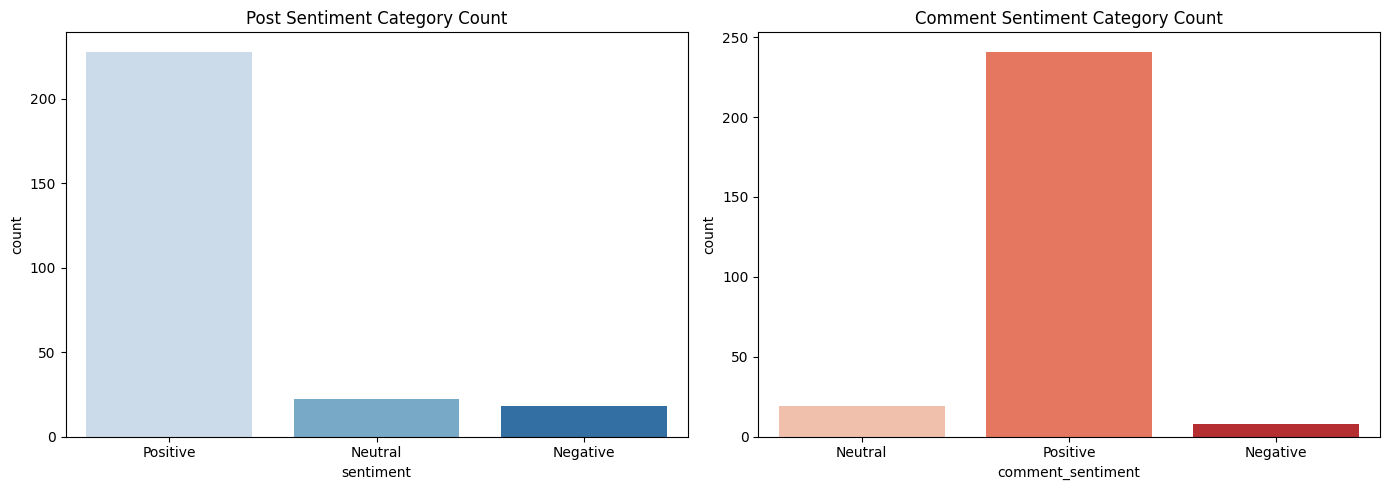

In [ ]:
plot_sentiment_counts(dfControversial)

In [ ]:
def plot_sentiment_distributions(df):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(df['sentiment_score'], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title("Post Sentiment Score Distribution")

    sns.histplot(df['avg_comment_sentiment'], kde=True, ax=axes[1], color="salmon")
    axes[1].set_title("Average Comment Sentiment Score Distribution")
    plt.tight_layout()
    plt.show()

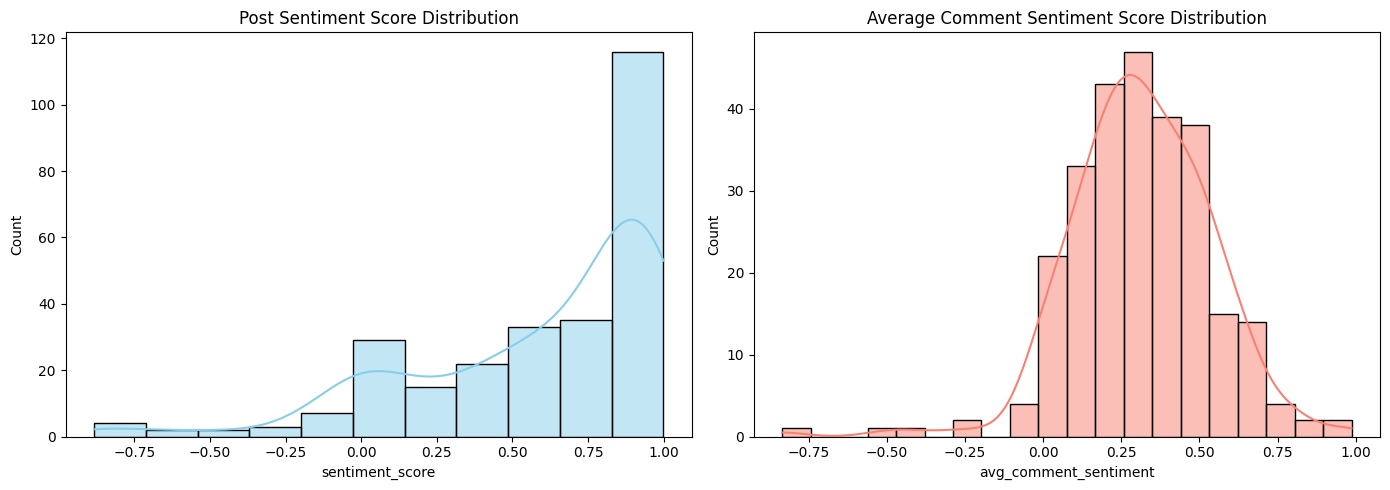

In [ ]:
plot_sentiment_distributions(dfControversial)

In [ ]:
def plot_pos_sentiment_by_destination(df):
    plt.figure(figsize=(14, 6))
    df_dest = df.dropna(subset=['destination'])
    avg_sentiments = df_dest.groupby('destination')[['sentiment_score', 'avg_comment_sentiment']].mean()
    avg_sentiments['combined_avg_sentiment'] = avg_sentiments[['sentiment_score', 'avg_comment_sentiment']].mean(axis=1)
    avg_sentiments = avg_sentiments.sort_values(by='combined_avg_sentiment', ascending=False)
    top_15 = avg_sentiments.head(15)
    top_15[['sentiment_score', 'avg_comment_sentiment']].plot(kind='bar', figsize=(14, 6))
    plt.title("Average Sentiment by Destination (Sorted by Combined Sentiment)")
    plt.ylabel("Sentiment Score")
    plt.xticks(fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_neg_sentiment_by_destination(df):
    plt.figure(figsize=(14, 6))
    df_dest = df.dropna(subset=['destination'])
    avg_sentiments = df_dest.groupby('destination')[['sentiment_score', 'avg_comment_sentiment']].mean()
    avg_sentiments['combined_avg_sentiment'] = avg_sentiments[['sentiment_score', 'avg_comment_sentiment']].mean(axis=1)
    avg_sentiments = avg_sentiments.sort_values(by='combined_avg_sentiment', ascending=True)
    top_15 = avg_sentiments.head(15)
    top_15[['sentiment_score', 'avg_comment_sentiment']].plot(kind='bar', figsize=(14, 6))
    plt.title("Average Sentiment by Destination (Sorted by Combined Sentiment)")
    plt.ylabel("Sentiment Score")
    plt.xticks(fontsize=12)
    plt.tight_layout()
    plt.show()

<Figure size 1400x600 with 0 Axes>

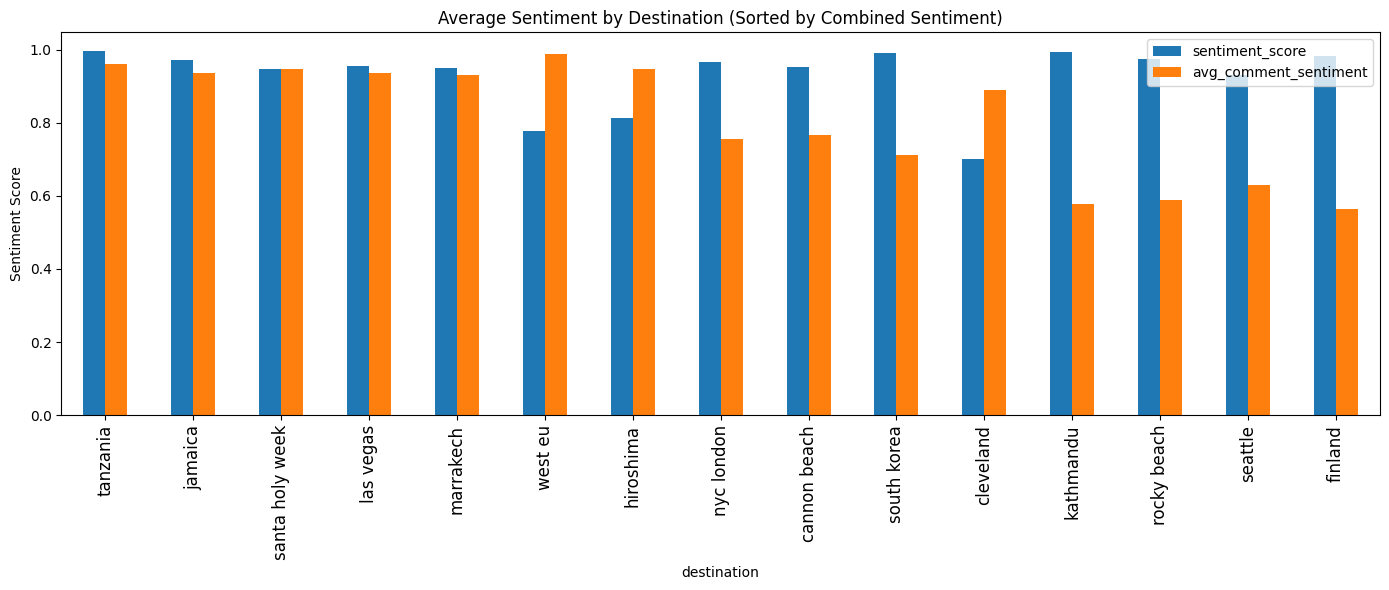

In [ ]:
plot_pos_sentiment_by_destination(dfHot)

<Figure size 1400x600 with 0 Axes>

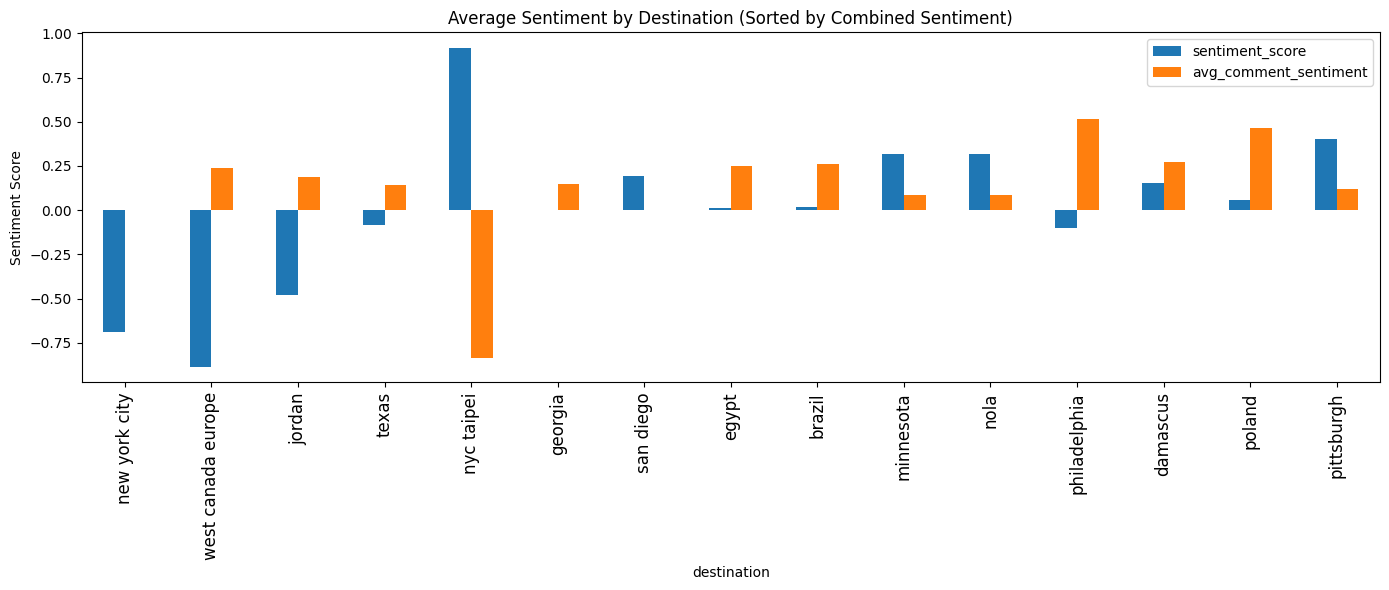

In [ ]:
plot_neg_sentiment_by_destination(dfControversial)

In [ ]:
def plot_con_sentiment_by_destination(df):
    plt.figure(figsize=(14, 6))
    df_dest = df.dropna(subset=['destination'])
    avg_sentiments = df_dest.groupby('destination')[['sentiment_score', 'avg_comment_sentiment']].mean()

    # Filter for controversial
    controversial = avg_sentiments[((avg_sentiments['sentiment_score'] > 0) & (avg_sentiments['avg_comment_sentiment'] < 0)) |
                                     ((avg_sentiments['sentiment_score'] < 0) & (avg_sentiments['avg_comment_sentiment'] > 0))]

    controversial.plot(kind='bar', figsize=(14, 6))
    plt.title("Controversial Destinations: Positive Posts vs Negative Comments")
    plt.ylabel("Sentiment Score")
    plt.xticks(fontsize=12)
    plt.tight_layout()
    plt.show()

<Figure size 1400x600 with 0 Axes>

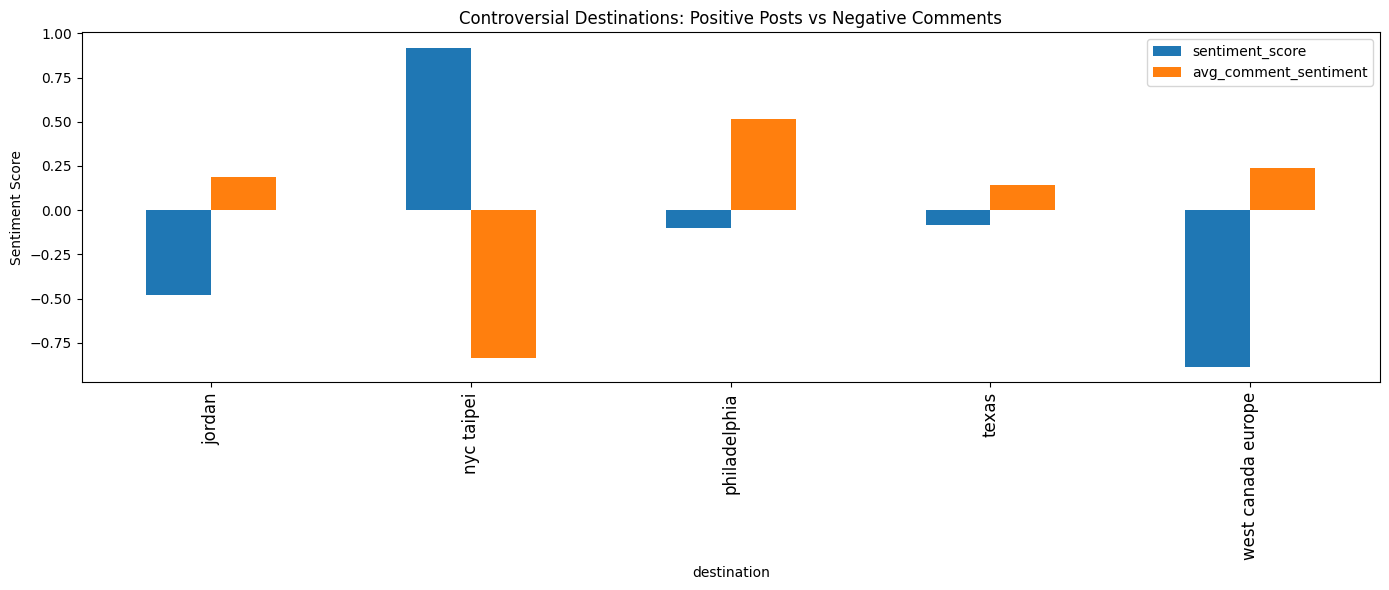

In [ ]:
plot_con_sentiment_by_destination(dfControversial)